<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/tutorial%20EDA%20para%20Data%20Science%20flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGA DE DATOS

In [1]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# el archivo lo tengo en el mac en la carpeta trabajo master y se llama kaggle.json
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [3]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [4]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder. 

In [5]:
! kaggle datasets download arshid/iris-flower-dataset

iris-flower-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import pandas as pd

In [ ]:
"""# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/car-price-prediction.zip") # esta es la dirección donde esta el zip
datazip.extract("CarPrice_Assignment.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. """


'# si los archivos vienen en zip se abren de la siguiente manera. \nimport zipfile # importamos esta librería\ndatazip = zipfile.ZipFile("/content/car-price-prediction.zip") # esta es la dirección donde esta el zip\ndatazip.extract("CarPrice_Assignment.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. \n# a partir de este momento ya lo tenemos en temporal. '

In [7]:
import zipfile

In [8]:
datazip = zipfile.ZipFile("/content/iris-flower-dataset.zip")

In [9]:
datazip.extract("IRIS.csv")

'/content/IRIS.csv'

# LIMPIEZA DE DATOS

In [10]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Tipo de datos

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
print(df.shape)
print(type(df.shape))

(150, 5)
<class 'tuple'>


In [13]:
df["species"].unique() # aqui le que estamos buscando son los nombres de las species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### vamos a dividir en train y test

In [14]:
from sklearn.model_selection import  train_test_split

In [15]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["species"])

## Valores Nulos

In [16]:
df_train.info() # vemos que no tenemos ningún valor nulo. son 120 filas 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 13 to 17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [17]:
df_test.info()# son 30 filas. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 88 to 141
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  30 non-null     float64
 1   sepal_width   30 non-null     float64
 2   petal_length  30 non-null     float64
 3   petal_width   30 non-null     float64
 4   species       30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [18]:
# otra manera de hacerlo es la siguiente
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column"{column}" has {num_nulls} nulls')

Column"sepal_length" has 0 nulls
Column"sepal_width" has 0 nulls
Column"petal_length" has 0 nulls
Column"petal_width" has 0 nulls
Column"species" has 0 nulls


## Valores duplicados

En este caso, los valores duplicados no nos interesan por dos razones. La primera es porque sabemos que el dataset no contiene valores duplicados que no deban tenerse en cuenta para el análisis. Esto en la práctica no lo sabríamos, pero como es un dataset clásico esta información es conocida. La segunda es que si miramos el tamaño de nuestro dataset, tenemos solamente 150 registros, por lo que si eliminamos duplicados corremos el riesgo de no poder realizar un análisis suficiente de los datos.

Igualmente, como algunos se preguntarán cómo podríamos atacar esta parte del EDA, lo mostraremos debajo a pesar de que no se realizarán cambios reales sobre el DataFrame.

Primero buscaremos los valores repetidos en el dataframe. Esto podemos hacerlo con el método .duplicated(). Este método devuelve una serie de True/False que tiene True en la posición donde hay un duplicado y False en la posición donde no la hay. Si le pasamos eso al DataFrame original, es como si estuvieramos filtrando por los valores que están duplicados.

Una observación es que el método duplicated por defecto borra el primer elemento repetido, pero como nos interesa ver todos los elementos, le pasamos el argumento "keep" como False, lo que significa que queremos ver todos los valores repetidos.

In [19]:
df_train[df_train.duplicated(keep=False)] # observamos que ha dos duplicados. 

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
df_train.drop_duplicates() # asi eliminaríamos todos los valores duplicados, excepto el primero.
# como vemos debajo tenemos 119 filas en vez de 120 como hemos visto antes. lo que hemos hecho ha sido eliminar un de los dos duplicados. 

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa
127,6.1,3.0,4.9,1.8,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa


In [21]:
df_train.shape # si vemos aquí no ha quitado nada ya que el drop no lo hemos hecho en el dataframe. 

(120, 5)

# Método 1: Sobreescribir el valor de df
df = df.drop_duplicates()

# Método 2: Guardar el valor en otra variable
df_dedup = df.drop_duplicates()

# Método 3: Sobreescribir inplace
df.drop_duplicates(inplace=True)

# VISUALIZACIÓN

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante, para que puedan ver cómo hacerlo y cómo utilizar Seaborn a nuestro favor para hacerlo. En la sección final del notebook utilizaremos PCA (un método de reducción de dimensionalidad) para intentar visualizar todo el dataset en una sola gráfica.

## ANALISIS UNIVARIANTE.

El análisis univariante se centra en una única variable a la vez. No nos interesa ver el comportamiento de la variable en relación a las demás, sino en relación a si misma. Cómo es su distribución? Es una categoría o una variable continua? Hay alguna variable que nos llame la atención? Todo esto es lo que queremos responder en este análisis.

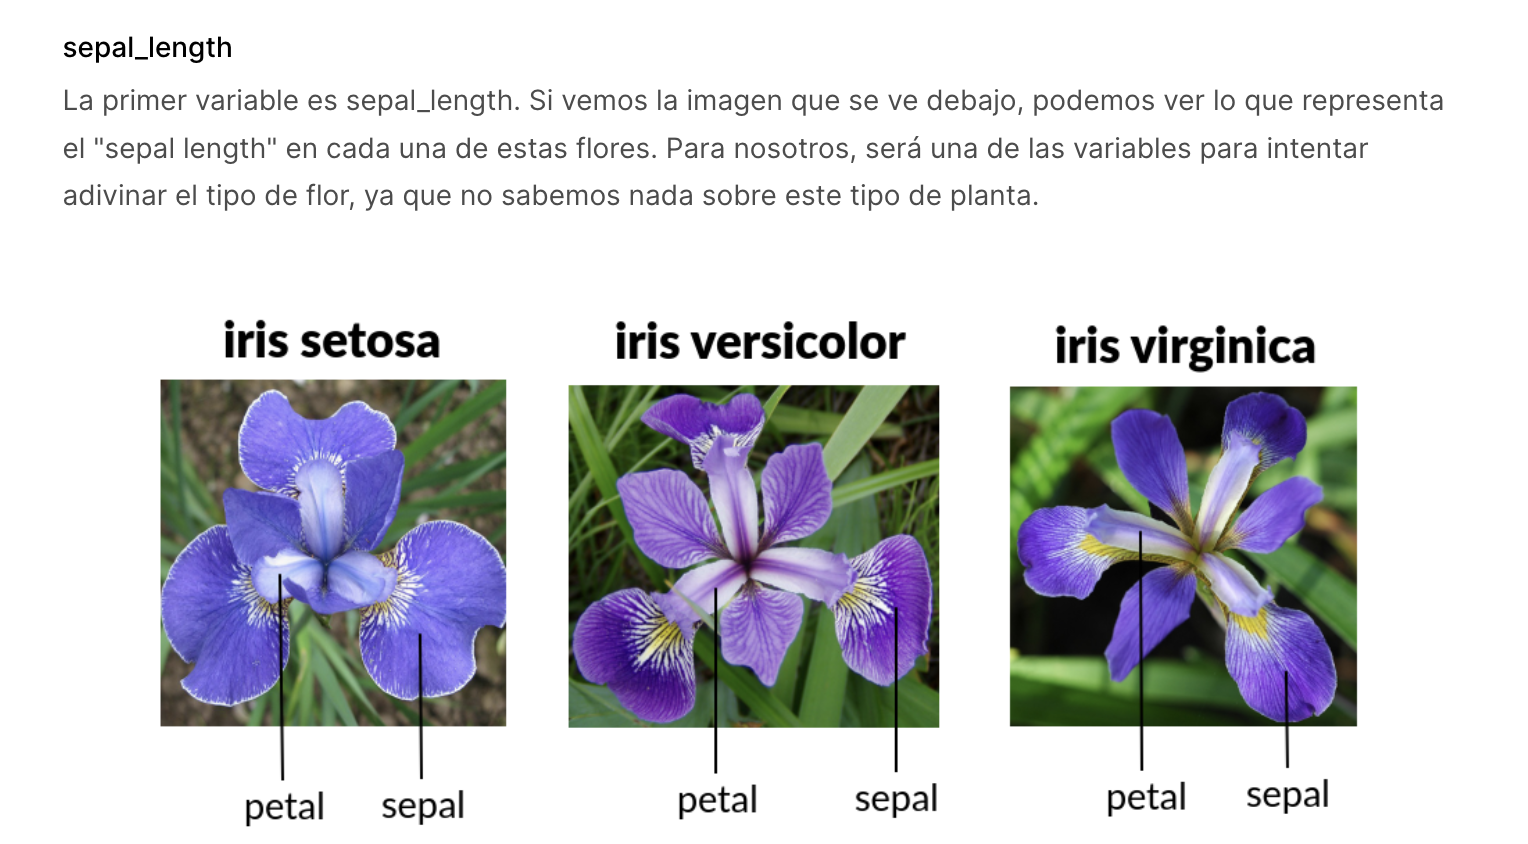